In [48]:
import json
import urllib
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import numpy as np

In [2]:
url = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json"

In [5]:
with urllib.request.urlopen(url) as url:
    data = json.loads(url.read().decode())

In [8]:
sentences = []
labels = []
for line in data:
    sentences.append(line["headline"])
    labels.append(line["is_sarcastic"])

In [9]:
print(len(sentences))
print(len(labels))

26709
26709


In [12]:
vocab = 10000
training_len = 20000
oov_token = "OOV"
max_len = 32
embedding_dim = 16
truncate_type = "post"
padding = "post"

In [16]:
training_data = sentences[0:training_len]
testing_data = sentences[training_len:]
training_label = labels[0:training_len]
testing_label = labels[training_len:]

In [17]:
print(len(training_data))
print(len(testing_data))
print(len(training_label))
print(len(testing_label))

20000
6709
20000
6709


In [20]:
tokenizer = Tokenizer(num_words =vocab ,  oov_token = oov_token)
tokenizer.fit_on_texts(training_data)
training_sequence = tokenizer.texts_to_sequences(training_data)

In [26]:
padded_training_sequence = pad_sequences(training_sequence , maxlen = max_len , truncating = truncate_type , padding = padding)

In [30]:
testing_sequence = tokenizer.texts_to_sequences(testing_data)
padded_testing_sequence = pad_sequences(testing_sequence , maxlen = max_len , truncating = truncate_type , padding = padding)

In [31]:
print(padded_training_sequence.shape)
print(padded_testing_sequence.shape)

(20000, 32)
(6709, 32)


In [49]:
padded_training_sequence = np.array(padded_training_sequence)
padded_testing_sequence = np.array(padded_testing_sequence)
training_label = np.array(training_label)
testing_label = np.array(testing_label)

In [32]:
### intantiating vectorizing model

In [69]:
model = tf.keras.Sequential([ tf.keras.layers.Embedding( vocab , embedding_dim , input_length = max_len) , 
                            tf.keras.layers.GlobalAveragePooling1D() , 
                            tf.keras.layers.Flatten() , 
                            tf.keras.layers.Dense(6 , activation = 'relu') , 
                            tf.keras.layers.Dense(1 , activation = "sigmoid")])

model.compile(loss = "binary_crossentropy" , metrics = ["accuracy"] , optimizer = 'adam')

In [70]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 32, 16)            160000    
_________________________________________________________________
global_average_pooling1d_5 ( (None, 16)                0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________


In [71]:
epoch = 15

In [72]:
history = model.fit(padded_training_sequence , training_label , validation_data = (padded_testing_sequence , testing_label) , epochs = epoch)

Epoch 1/15
625/625 [==============================] - 7s 9ms/step - loss: 0.6655 - accuracy: 0.5849 - val_loss: 0.4736 - val_accuracy: 0.8159
Epoch 2/15
625/625 [==============================] - 5s 8ms/step - loss: 0.4020 - accuracy: 0.8547 - val_loss: 0.3601 - val_accuracy: 0.8517
Epoch 3/15
625/625 [==============================] - 5s 9ms/step - loss: 0.2840 - accuracy: 0.8914 - val_loss: 0.3377 - val_accuracy: 0.8569
Epoch 4/15
625/625 [==============================] - 5s 8ms/step - loss: 0.2248 - accuracy: 0.9146 - val_loss: 0.3398 - val_accuracy: 0.8515
Epoch 5/15
625/625 [==============================] - 5s 8ms/step - loss: 0.1881 - accuracy: 0.9300 - val_loss: 0.3597 - val_accuracy: 0.8462
Epoch 6/15
625/625 [==============================] - 5s 8ms/step - loss: 0.1571 - accuracy: 0.9461 - val_loss: 0.3657 - val_accuracy: 0.8526
Epoch 7/15
625/625 [==============================] - 6s 9ms/step - loss: 0.1367 - accuracy: 0.9542 - val_loss: 0.3858 - val_accuracy: 0.8529
Epoch 

In [73]:
## visualising accuracy and loss

In [74]:
import matplotlib.pyplot as plt

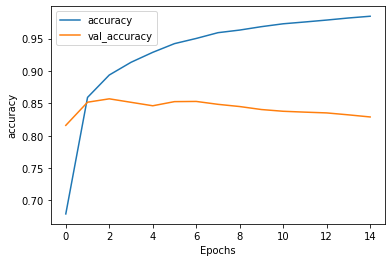

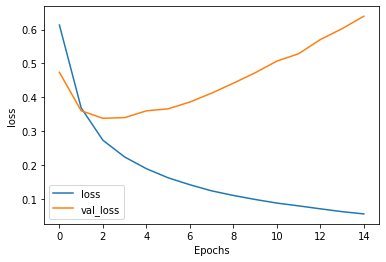

In [75]:
def graphplot(history , string):
    plt.plot(history.history[string])
    plt.plot(history.history["val_"+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string , "val_"+string])
    plt.show()
    
graphplot( history, "accuracy" )
graphplot( history , "loss" )

In [76]:
### we can see here that the val_loss is increasing , lets change some hyper parameters

In [77]:
vocab = 10000
training_len = 20000
oov_token = "OOV"
max_len = 16   ## earlier was 32
embedding_dim = 16
truncate_type = "post"
padding = "post"

Epoch 1/15
625/625 [==============================] - 8s 10ms/step - loss: 0.6331 - accuracy: 0.6503 - val_loss: 0.3915 - val_accuracy: 0.8407
Epoch 2/15
625/625 [==============================] - 6s 9ms/step - loss: 0.3228 - accuracy: 0.8776 - val_loss: 0.3392 - val_accuracy: 0.8539
Epoch 3/15
625/625 [==============================] - 6s 9ms/step - loss: 0.2268 - accuracy: 0.9134 - val_loss: 0.3419 - val_accuracy: 0.8520
Epoch 4/15
625/625 [==============================] - 6s 9ms/step - loss: 0.1786 - accuracy: 0.9356 - val_loss: 0.3633 - val_accuracy: 0.8520
Epoch 5/15
625/625 [==============================] - 5s 9ms/step - loss: 0.1404 - accuracy: 0.9525 - val_loss: 0.3948 - val_accuracy: 0.8502
Epoch 6/15
625/625 [==============================] - 5s 9ms/step - loss: 0.1216 - accuracy: 0.9596 - val_loss: 0.4309 - val_accuracy: 0.8451
Epoch 7/15
625/625 [==============================] - 5s 8ms/step - loss: 0.0959 - accuracy: 0.9701 - val_loss: 0.4763 - val_accuracy: 0.8389
Epoch

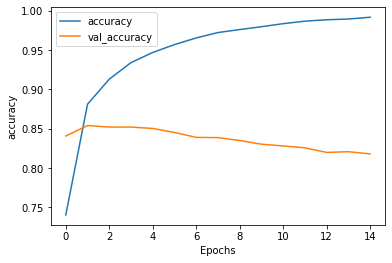

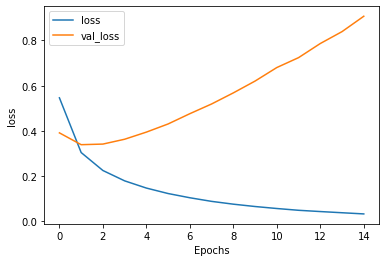

In [78]:
tokenizer = Tokenizer(num_words =vocab ,  oov_token = oov_token)
tokenizer.fit_on_texts(training_data)
training_sequence = tokenizer.texts_to_sequences(training_data)

padded_training_sequence = pad_sequences(training_sequence , maxlen = max_len , truncating = truncate_type , padding = padding)

testing_sequence = tokenizer.texts_to_sequences(testing_data)

padded_testing_sequence = pad_sequences(testing_sequence , maxlen = max_len , truncating = truncate_type , padding = padding)
padded_training_sequence = np.array(padded_training_sequence)
padded_testing_sequence = np.array(padded_testing_sequence)

training_label = np.array(training_label)
testing_label = np.array(testing_label)

model = tf.keras.Sequential([ tf.keras.layers.Embedding( vocab , embedding_dim , input_length = max_len) , 
                            tf.keras.layers.GlobalAveragePooling1D() , 
                            tf.keras.layers.Flatten() , 
                            tf.keras.layers.Dense(6 , activation = 'relu') , 
                            tf.keras.layers.Dense(1 , activation = "sigmoid")])

model.compile(loss = "binary_crossentropy" , metrics = ["accuracy"] , optimizer = 'adam')

epoch = 15

history = model.fit(padded_training_sequence , training_label , validation_data = (padded_testing_sequence , testing_label) , 
                    epochs = epoch)



##3 visualisation

graphplot( history, "accuracy" )
graphplot( history , "loss" )

Epoch 1/15
625/625 [==============================] - 17s 23ms/step - loss: 0.6003 - accuracy: 0.6792 - val_loss: 0.3608 - val_accuracy: 0.8454
Epoch 2/15
625/625 [==============================] - 13s 21ms/step - loss: 0.2762 - accuracy: 0.8922 - val_loss: 0.3401 - val_accuracy: 0.8545
Epoch 3/15
625/625 [==============================] - 11s 17ms/step - loss: 0.1943 - accuracy: 0.9294 - val_loss: 0.3606 - val_accuracy: 0.8509
Epoch 4/15
625/625 [==============================] - 12s 19ms/step - loss: 0.1482 - accuracy: 0.9473 - val_loss: 0.4025 - val_accuracy: 0.8430
Epoch 5/15
625/625 [==============================] - 12s 18ms/step - loss: 0.1194 - accuracy: 0.9606 - val_loss: 0.4519 - val_accuracy: 0.8369
Epoch 6/15
625/625 [==============================] - 10s 17ms/step - loss: 0.0966 - accuracy: 0.9673 - val_loss: 0.4935 - val_accuracy: 0.8392
Epoch 7/15
625/625 [==============================] - 11s 17ms/step - loss: 0.0789 - accuracy: 0.9745 - val_loss: 0.5442 - val_accuracy:

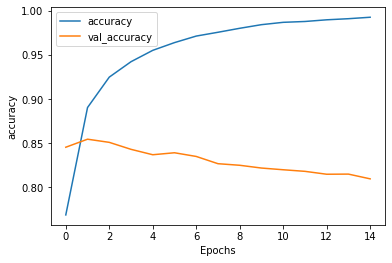

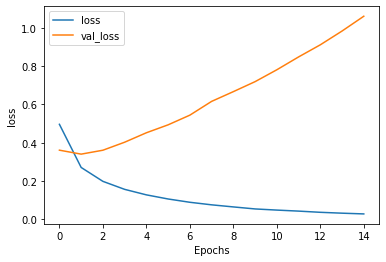

In [79]:
#### another change in hyperparameter


vocab = 10000
training_len = 20000
oov_token = "OOV"
max_len = 16   ## earlier was 32
embedding_dim = 32   ## earlier was 16
truncate_type = "post"
padding = "post"


tokenizer = Tokenizer(num_words =vocab ,  oov_token = oov_token)
tokenizer.fit_on_texts(training_data)
training_sequence = tokenizer.texts_to_sequences(training_data)

padded_training_sequence = pad_sequences(training_sequence , maxlen = max_len , truncating = truncate_type , padding = padding)

testing_sequence = tokenizer.texts_to_sequences(testing_data)

padded_testing_sequence = pad_sequences(testing_sequence , maxlen = max_len , truncating = truncate_type , padding = padding)
padded_training_sequence = np.array(padded_training_sequence)
padded_testing_sequence = np.array(padded_testing_sequence)

training_label = np.array(training_label)
testing_label = np.array(testing_label)

model = tf.keras.Sequential([ tf.keras.layers.Embedding( vocab , embedding_dim , input_length = max_len) , 
                            tf.keras.layers.GlobalAveragePooling1D() , 
                            tf.keras.layers.Flatten() , 
                            tf.keras.layers.Dense(6 , activation = 'relu') , 
                            tf.keras.layers.Dense(1 , activation = "sigmoid")])

model.compile(loss = "binary_crossentropy" , metrics = ["accuracy"] , optimizer = 'adam')

epoch = 15

history = model.fit(padded_training_sequence , training_label , validation_data = (padded_testing_sequence , testing_label) , 
                    epochs = epoch)



##3 visualisation

graphplot( history, "accuracy" )
graphplot( history , "loss" )

Epoch 1/15
625/625 [==============================] - 5s 6ms/step - loss: 0.6901 - accuracy: 0.5507 - val_loss: 0.6855 - val_accuracy: 0.5633
Epoch 2/15
625/625 [==============================] - 3s 5ms/step - loss: 0.6856 - accuracy: 0.5621 - val_loss: 0.6852 - val_accuracy: 0.5633
Epoch 3/15
625/625 [==============================] - 3s 5ms/step - loss: 0.6866 - accuracy: 0.5573 - val_loss: 0.6851 - val_accuracy: 0.5633
Epoch 4/15
625/625 [==============================] - 3s 5ms/step - loss: 0.6841 - accuracy: 0.5675 - val_loss: 0.6852 - val_accuracy: 0.5633
Epoch 5/15
625/625 [==============================] - 3s 5ms/step - loss: 0.6859 - accuracy: 0.5601 - val_loss: 0.6851 - val_accuracy: 0.5633
Epoch 6/15
625/625 [==============================] - 3s 5ms/step - loss: 0.6855 - accuracy: 0.5621 - val_loss: 0.6851 - val_accuracy: 0.5633
Epoch 7/15
625/625 [==============================] - 3s 5ms/step - loss: 0.6851 - accuracy: 0.5634 - val_loss: 0.6852 - val_accuracy: 0.5633
Epoch 

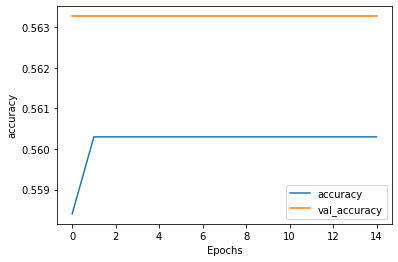

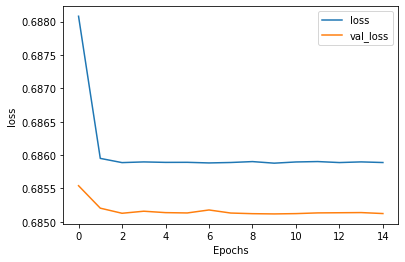

In [80]:
#### another change in hyperparameter


vocab = 1000
training_len = 20000
oov_token = "OOV"
max_len = 32   ## earlier was 32
embedding_dim = 32   ## earlier was 16
truncate_type = "post"
padding = "post"


tokenizer = Tokenizer(num_words =vocab ,  oov_token = oov_token)
tokenizer.fit_on_texts(training_data)
training_sequence = tokenizer.texts_to_sequences(training_data)

padded_training_sequence = pad_sequences(training_sequence , maxlen = max_len , truncating = truncate_type , padding = padding)

testing_sequence = tokenizer.texts_to_sequences(testing_data)

padded_testing_sequence = pad_sequences(testing_sequence , maxlen = max_len , truncating = truncate_type , padding = padding)
padded_training_sequence = np.array(padded_training_sequence)
padded_testing_sequence = np.array(padded_testing_sequence)

training_label = np.array(training_label)
testing_label = np.array(testing_label)

model = tf.keras.Sequential([ tf.keras.layers.Embedding( vocab , embedding_dim , input_length = max_len) , 
                            tf.keras.layers.GlobalAveragePooling1D() , 
                            tf.keras.layers.Flatten() , 
                            tf.keras.layers.Dense(6 , activation = 'relu') , 
                            tf.keras.layers.Dense(1 , activation = "sigmoid")])

model.compile(loss = "binary_crossentropy" , metrics = ["accuracy"] , optimizer = 'adam')

epoch = 15

history = model.fit(padded_training_sequence , training_label , validation_data = (padded_testing_sequence , testing_label) , 
                    epochs = epoch)



##3 visualisation

graphplot( history, "accuracy" )
graphplot( history , "loss" )

Epoch 1/15
625/625 [==============================] - 9s 10ms/step - loss: 0.6853 - accuracy: 0.5577 - val_loss: 0.6627 - val_accuracy: 0.5633
Epoch 2/15
625/625 [==============================] - 5s 9ms/step - loss: 0.6349 - accuracy: 0.5878 - val_loss: 0.5427 - val_accuracy: 0.7834
Epoch 3/15
625/625 [==============================] - 6s 10ms/step - loss: 0.4946 - accuracy: 0.8076 - val_loss: 0.4495 - val_accuracy: 0.8299
Epoch 4/15
625/625 [==============================] - 6s 10ms/step - loss: 0.4006 - accuracy: 0.8709 - val_loss: 0.4043 - val_accuracy: 0.8422
Epoch 5/15
625/625 [==============================] - 6s 9ms/step - loss: 0.3364 - accuracy: 0.8928 - val_loss: 0.3799 - val_accuracy: 0.8505
Epoch 6/15
625/625 [==============================] - 6s 9ms/step - loss: 0.2936 - accuracy: 0.9044 - val_loss: 0.3631 - val_accuracy: 0.8541
Epoch 7/15
625/625 [==============================] - 6s 9ms/step - loss: 0.2537 - accuracy: 0.9159 - val_loss: 0.3670 - val_accuracy: 0.8438
Epo

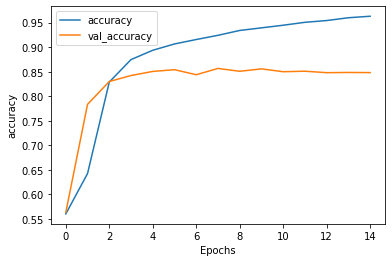

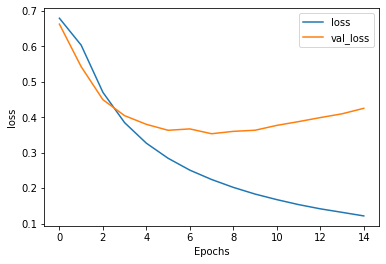

In [81]:
#### another change in hyperparameter


vocab = 10000
training_len = 20000
oov_token = "OOV"
max_len = 64   ## earlier was 32
embedding_dim = 16   ## earlier was 16
truncate_type = "post"
padding = "post"


tokenizer = Tokenizer(num_words =vocab ,  oov_token = oov_token)
tokenizer.fit_on_texts(training_data)
training_sequence = tokenizer.texts_to_sequences(training_data)

padded_training_sequence = pad_sequences(training_sequence , maxlen = max_len , truncating = truncate_type , padding = padding)

testing_sequence = tokenizer.texts_to_sequences(testing_data)

padded_testing_sequence = pad_sequences(testing_sequence , maxlen = max_len , truncating = truncate_type , padding = padding)
padded_training_sequence = np.array(padded_training_sequence)
padded_testing_sequence = np.array(padded_testing_sequence)

training_label = np.array(training_label)
testing_label = np.array(testing_label)

model = tf.keras.Sequential([ tf.keras.layers.Embedding( vocab , embedding_dim , input_length = max_len) , 
                            tf.keras.layers.GlobalAveragePooling1D() , 
                            tf.keras.layers.Flatten() , 
                            tf.keras.layers.Dense(6 , activation = 'relu') , 
                            tf.keras.layers.Dense(1 , activation = "sigmoid")])

model.compile(loss = "binary_crossentropy" , metrics = ["accuracy"] , optimizer = 'adam')

epoch = 15

history = model.fit(padded_training_sequence , training_label , validation_data = (padded_testing_sequence , testing_label) , 
                    epochs = epoch)



##3 visualisation

graphplot( history, "accuracy" )
graphplot( history , "loss" )

Epoch 1/15
625/625 [==============================] - 15s 22ms/step - loss: 0.6840 - accuracy: 0.5554 - val_loss: 0.6402 - val_accuracy: 0.8007
Epoch 2/15
625/625 [==============================] - 15s 24ms/step - loss: 0.5726 - accuracy: 0.7632 - val_loss: 0.4335 - val_accuracy: 0.8283
Epoch 3/15
625/625 [==============================] - 15s 24ms/step - loss: 0.3773 - accuracy: 0.8567 - val_loss: 0.3754 - val_accuracy: 0.8395
Epoch 4/15
625/625 [==============================] - 16s 26ms/step - loss: 0.3092 - accuracy: 0.8847 - val_loss: 0.3507 - val_accuracy: 0.8536
Epoch 5/15
625/625 [==============================] - 19s 30ms/step - loss: 0.2703 - accuracy: 0.8972 - val_loss: 0.3430 - val_accuracy: 0.8568
Epoch 6/15
625/625 [==============================] - 19s 31ms/step - loss: 0.2429 - accuracy: 0.9067 - val_loss: 0.3408 - val_accuracy: 0.8517
Epoch 7/15
625/625 [==============================] - 15s 25ms/step - loss: 0.2111 - accuracy: 0.9212 - val_loss: 0.3386 - val_accuracy:

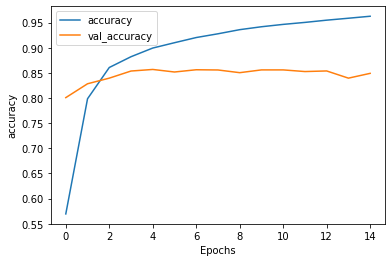

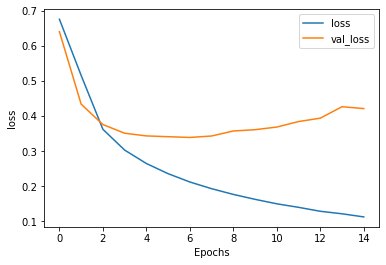

In [82]:
#### another change in hyperparameter


vocab = 10000
training_len = 20000
oov_token = "OOV"
max_len = 128   ## earlier was 32
embedding_dim = 32   ## earlier was 16
truncate_type = "post"
padding = "post"


tokenizer = Tokenizer(num_words =vocab ,  oov_token = oov_token)
tokenizer.fit_on_texts(training_data)
training_sequence = tokenizer.texts_to_sequences(training_data)

padded_training_sequence = pad_sequences(training_sequence , maxlen = max_len , truncating = truncate_type , padding = padding)

testing_sequence = tokenizer.texts_to_sequences(testing_data)

padded_testing_sequence = pad_sequences(testing_sequence , maxlen = max_len , truncating = truncate_type , padding = padding)
padded_training_sequence = np.array(padded_training_sequence)
padded_testing_sequence = np.array(padded_testing_sequence)

training_label = np.array(training_label)
testing_label = np.array(testing_label)

model = tf.keras.Sequential([ tf.keras.layers.Embedding( vocab , embedding_dim , input_length = max_len) , 
                            tf.keras.layers.GlobalAveragePooling1D() , 
                            tf.keras.layers.Flatten() , 
                            tf.keras.layers.Dense(6 , activation = 'relu') , 
                            tf.keras.layers.Dense(1 , activation = "sigmoid")])

model.compile(loss = "binary_crossentropy" , metrics = ["accuracy"] , optimizer = 'adam')

epoch = 15

history = model.fit(padded_training_sequence , training_label , validation_data = (padded_testing_sequence , testing_label) , 
                    epochs = epoch)



##3 visualisation

graphplot( history, "accuracy" )
graphplot( history , "loss" )

Epoch 1/15
625/625 [==============================] - 9s 10ms/step - loss: 0.6878 - accuracy: 0.5594 - val_loss: 0.6816 - val_accuracy: 0.5633
Epoch 2/15
625/625 [==============================] - 6s 10ms/step - loss: 0.6787 - accuracy: 0.5590 - val_loss: 0.6344 - val_accuracy: 0.6157
Epoch 3/15
625/625 [==============================] - 6s 10ms/step - loss: 0.5710 - accuracy: 0.7685 - val_loss: 0.4577 - val_accuracy: 0.8100
Epoch 4/15
625/625 [==============================] - 6s 10ms/step - loss: 0.4001 - accuracy: 0.8424 - val_loss: 0.3922 - val_accuracy: 0.8310
Epoch 5/15
625/625 [==============================] - 6s 10ms/step - loss: 0.3291 - accuracy: 0.8740 - val_loss: 0.3692 - val_accuracy: 0.8417
Epoch 6/15
625/625 [==============================] - 6s 10ms/step - loss: 0.2899 - accuracy: 0.8901 - val_loss: 0.3572 - val_accuracy: 0.8454
Epoch 7/15
625/625 [==============================] - 6s 10ms/step - loss: 0.2717 - accuracy: 0.8941 - val_loss: 0.3462 - val_accuracy: 0.8544

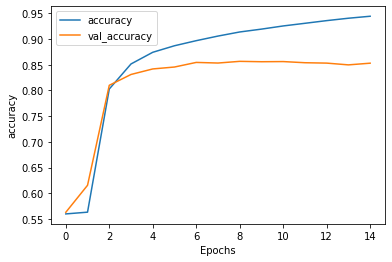

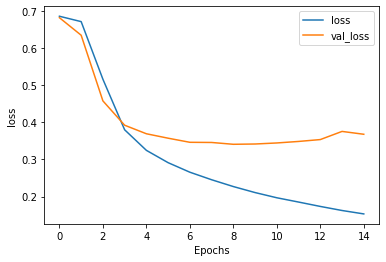

In [85]:
#### another change in hyperparameter


vocab = 10000
training_len = 20000
oov_token = "OOV"
max_len = 128   ## earlier was 32
embedding_dim = 16   ## earlier was 16
truncate_type = "post"
padding = "post"


tokenizer = Tokenizer(num_words =vocab ,  oov_token = oov_token)
tokenizer.fit_on_texts(training_data)
training_sequence = tokenizer.texts_to_sequences(training_data)

padded_training_sequence = pad_sequences(training_sequence , maxlen = max_len , truncating = truncate_type , padding = padding)

testing_sequence = tokenizer.texts_to_sequences(testing_data)

padded_testing_sequence = pad_sequences(testing_sequence , maxlen = max_len , truncating = truncate_type , padding = padding)
padded_training_sequence = np.array(padded_training_sequence)
padded_testing_sequence = np.array(padded_testing_sequence)

training_label = np.array(training_label)
testing_label = np.array(testing_label)

model = tf.keras.Sequential([ tf.keras.layers.Embedding( vocab , embedding_dim , input_length = max_len) , 
                            tf.keras.layers.GlobalAveragePooling1D() , 
                            tf.keras.layers.Flatten() , 
                            tf.keras.layers.Dense(6 , activation = 'relu') , 
                            tf.keras.layers.Dense(1 , activation = "sigmoid")])

model.compile(loss = "binary_crossentropy" , metrics = ["accuracy"] , optimizer = 'adam')

epoch = 15

history = model.fit(padded_training_sequence , training_label , validation_data = (padded_testing_sequence , testing_label) , 
                    epochs = epoch)



##3 visualisation

graphplot( history, "accuracy" )
graphplot( history , "loss" )

Epoch 1/15
625/625 [==============================] - 10s 12ms/step - loss: 0.6873 - accuracy: 0.5595 - val_loss: 0.6818 - val_accuracy: 0.5633
Epoch 2/15
625/625 [==============================] - 7s 11ms/step - loss: 0.6777 - accuracy: 0.5622 - val_loss: 0.6520 - val_accuracy: 0.5633
Epoch 3/15
625/625 [==============================] - 7s 11ms/step - loss: 0.6301 - accuracy: 0.5951 - val_loss: 0.5591 - val_accuracy: 0.7383
Epoch 4/15
625/625 [==============================] - 7s 12ms/step - loss: 0.5200 - accuracy: 0.7834 - val_loss: 0.4781 - val_accuracy: 0.8238
Epoch 5/15
625/625 [==============================] - 7s 11ms/step - loss: 0.4371 - accuracy: 0.8514 - val_loss: 0.4400 - val_accuracy: 0.8068
Epoch 6/15
625/625 [==============================] - 7s 11ms/step - loss: 0.3834 - accuracy: 0.8721 - val_loss: 0.4060 - val_accuracy: 0.8338
Epoch 7/15
625/625 [==============================] - 7s 11ms/step - loss: 0.3427 - accuracy: 0.8834 - val_loss: 0.3839 - val_accuracy: 0.846

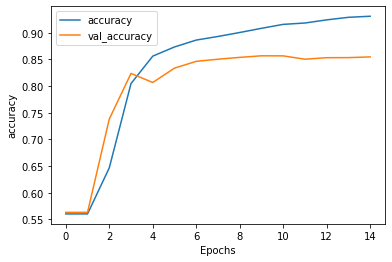

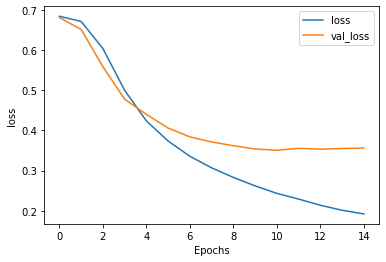

In [86]:
#### another change in hyperparameter


vocab = 10000
training_len = 20000
oov_token = "OOV"
max_len = 256   ## earlier was 32
embedding_dim = 16   ## earlier was 16
truncate_type = "post"
padding = "post"


tokenizer = Tokenizer(num_words =vocab ,  oov_token = oov_token)
tokenizer.fit_on_texts(training_data)
training_sequence = tokenizer.texts_to_sequences(training_data)

padded_training_sequence = pad_sequences(training_sequence , maxlen = max_len , truncating = truncate_type , padding = padding)

testing_sequence = tokenizer.texts_to_sequences(testing_data)

padded_testing_sequence = pad_sequences(testing_sequence , maxlen = max_len , truncating = truncate_type , padding = padding)
padded_training_sequence = np.array(padded_training_sequence)
padded_testing_sequence = np.array(padded_testing_sequence)

training_label = np.array(training_label)
testing_label = np.array(testing_label)

model = tf.keras.Sequential([ tf.keras.layers.Embedding( vocab , embedding_dim , input_length = max_len) , 
                            tf.keras.layers.GlobalAveragePooling1D() , 
                            tf.keras.layers.Flatten() , 
                            tf.keras.layers.Dense(6 , activation = 'relu') , 
                            tf.keras.layers.Dense(1 , activation = "sigmoid")])

model.compile(loss = "binary_crossentropy" , metrics = ["accuracy"] , optimizer = 'adam')

epoch = 15

history = model.fit(padded_training_sequence , training_label , validation_data = (padded_testing_sequence , testing_label) , 
                    epochs = epoch)



##3 visualisation

graphplot( history, "accuracy" )
graphplot( history , "loss" )

Epoch 1/15
625/625 [==============================] - 11s 15ms/step - loss: 0.6866 - accuracy: 0.5579 - val_loss: 0.6828 - val_accuracy: 0.5633
Epoch 2/15
625/625 [==============================] - 9s 15ms/step - loss: 0.6809 - accuracy: 0.5605 - val_loss: 0.6585 - val_accuracy: 0.5633
Epoch 3/15
625/625 [==============================] - 9s 15ms/step - loss: 0.6378 - accuracy: 0.5961 - val_loss: 0.5686 - val_accuracy: 0.7393
Epoch 4/15
625/625 [==============================] - 9s 15ms/step - loss: 0.5331 - accuracy: 0.7664 - val_loss: 0.4955 - val_accuracy: 0.8289
Epoch 5/15
625/625 [==============================] - 10s 15ms/step - loss: 0.4477 - accuracy: 0.8427 - val_loss: 0.4354 - val_accuracy: 0.8290
Epoch 6/15
625/625 [==============================] - 9s 15ms/step - loss: 0.3914 - accuracy: 0.8684 - val_loss: 0.4157 - val_accuracy: 0.8211
Epoch 7/15
625/625 [==============================] - 9s 15ms/step - loss: 0.3487 - accuracy: 0.8830 - val_loss: 0.3868 - val_accuracy: 0.84

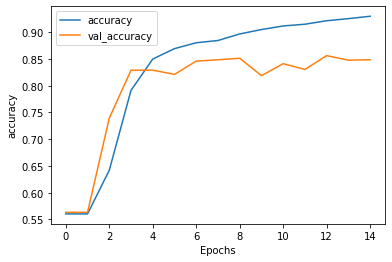

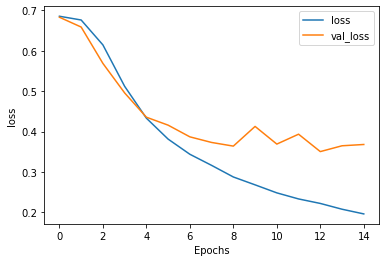

In [87]:
#### another change in hyperparameter


vocab = 10000
training_len = 20000
oov_token = "OOV"
max_len = 512   ## earlier was 32
embedding_dim = 16   ## earlier was 16
truncate_type = "post"
padding = "post"


tokenizer = Tokenizer(num_words =vocab ,  oov_token = oov_token)
tokenizer.fit_on_texts(training_data)
training_sequence = tokenizer.texts_to_sequences(training_data)

padded_training_sequence = pad_sequences(training_sequence , maxlen = max_len , truncating = truncate_type , padding = padding)

testing_sequence = tokenizer.texts_to_sequences(testing_data)

padded_testing_sequence = pad_sequences(testing_sequence , maxlen = max_len , truncating = truncate_type , padding = padding)
padded_training_sequence = np.array(padded_training_sequence)
padded_testing_sequence = np.array(padded_testing_sequence)

training_label = np.array(training_label)
testing_label = np.array(testing_label)

model = tf.keras.Sequential([ tf.keras.layers.Embedding( vocab , embedding_dim , input_length = max_len) , 
                            tf.keras.layers.GlobalAveragePooling1D() , 
                            tf.keras.layers.Flatten() , 
                            tf.keras.layers.Dense(6 , activation = 'relu') , 
                            tf.keras.layers.Dense(1 , activation = "sigmoid")])

model.compile(loss = "binary_crossentropy" , metrics = ["accuracy"] , optimizer = 'adam')

epoch = 15

history = model.fit(padded_training_sequence , training_label , validation_data = (padded_testing_sequence , testing_label) , 
                    epochs = epoch)



##3 visualisation

graphplot( history, "accuracy" )
graphplot( history , "loss" )

In [88]:
## in this graph we are getting decreasing val_loss and training_accuracy above 90 

Epoch 1/15
625/625 [==============================] - 9s 11ms/step - loss: 0.6871 - accuracy: 0.5617 - val_loss: 0.6778 - val_accuracy: 0.5633
Epoch 2/15
625/625 [==============================] - 8s 13ms/step - loss: 0.6593 - accuracy: 0.5804 - val_loss: 0.5335 - val_accuracy: 0.8158
Epoch 3/15
625/625 [==============================] - 8s 12ms/step - loss: 0.4594 - accuracy: 0.8223 - val_loss: 0.4041 - val_accuracy: 0.8274
Epoch 4/15
625/625 [==============================] - 6s 10ms/step - loss: 0.3465 - accuracy: 0.8604 - val_loss: 0.3690 - val_accuracy: 0.8456
Epoch 5/15
625/625 [==============================] - 6s 9ms/step - loss: 0.2957 - accuracy: 0.8809 - val_loss: 0.3650 - val_accuracy: 0.8408
Epoch 6/15
625/625 [==============================] - 6s 9ms/step - loss: 0.2679 - accuracy: 0.8938 - val_loss: 0.3483 - val_accuracy: 0.8551
Epoch 7/15
625/625 [==============================] - 6s 9ms/step - loss: 0.2399 - accuracy: 0.9096 - val_loss: 0.3446 - val_accuracy: 0.8571
Ep

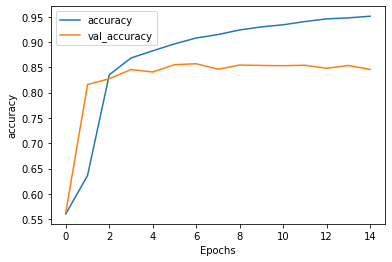

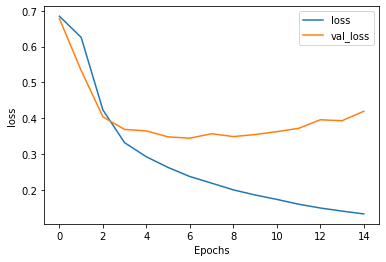

In [89]:
#### another change in hyperparameter


vocab = 10000
training_len = 20000
oov_token = "OOV"
max_len = 256   ## earlier was 32
embedding_dim = 16   ## earlier was 16
truncate_type = "post"
padding = "post"


tokenizer = Tokenizer(num_words =vocab ,  oov_token = oov_token)
tokenizer.fit_on_texts(training_data)
training_sequence = tokenizer.texts_to_sequences(training_data)

padded_training_sequence = pad_sequences(training_sequence , maxlen = max_len , truncating = truncate_type , padding = padding)

testing_sequence = tokenizer.texts_to_sequences(testing_data)

padded_testing_sequence = pad_sequences(testing_sequence , maxlen = max_len , truncating = truncate_type , padding = padding)
padded_training_sequence = np.array(padded_training_sequence)
padded_testing_sequence = np.array(padded_testing_sequence)

training_label = np.array(training_label)
testing_label = np.array(testing_label)

model = tf.keras.Sequential([ tf.keras.layers.Embedding( vocab , embedding_dim , input_length = max_len) , 
                            tf.keras.layers.GlobalAveragePooling1D() , 
                            tf.keras.layers.Flatten() , 
                            tf.keras.layers.Dense(24 , activation = 'relu') , 
                            tf.keras.layers.Dense(1 , activation = "sigmoid")])

model.compile(loss = "binary_crossentropy" , metrics = ["accuracy"] , optimizer = 'adam')

epoch = 15

history = model.fit(padded_training_sequence , training_label , validation_data = (padded_testing_sequence , testing_label) , 
                    epochs = epoch)



##3 visualisation

graphplot( history, "accuracy" )
graphplot( history , "loss" )

In [90]:
## we are getting accuracy of 80-85% on sentiments calssification